# Model Verification

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
k = [1,2,5,10,25,50]
q = np.arange(10,21,1)*10**5

In [35]:
table = pd.read_excel('C:\\Users\\bowenm\\Documents\\verification.xlsx')

In [36]:
names = []
for qval in q:
    for kval in k:
        names.append(str(kval) + ", " + str(qval))
table.columns = ['z']+names

In [37]:
table = table[:228]
table['z'] = .001*table['z']

In [38]:
table = table.set_index('z')
table = table.sort_index()

In [39]:
table

,"1, 1000000","2, 1000000","5, 1000000","10, 1000000","25, 1000000","50, 1000000","1, 1100000","2, 1100000","5, 1100000","10, 1100000",...,"5, 1900000","10, 1900000","25, 1900000","50, 1900000","1, 2000000","2, 2000000","5, 2000000","10, 2000000","25, 2000000","50, 2000000"
z,,,,,,,,,,,,,,,,,,,,,
0.000000,3547.110153,2047.126402,1147.136152,847.139402,667.141351,607.142001,3872.506169,2222.52,1232.534767,902.538342,...,1915.723688,1345.729863,1003.733567,889.734801,6801.070306,3801.102805,2001.122304,1401.128803,1041.132702,921.134001
0.000932,2615.164440,1581.153547,960.747011,753.944832,629.863525,588.503088,2847.365884,1709.95,1027.506712,800.024315,...,1561.584321,1168.660181,932.905697,854.320868,4937.178881,2869.157094,1628.344022,1214.739664,966.577049,883.856177
0.000933,2613.836547,1580.489600,960.481432,753.812043,629.810409,588.476530,2845.905202,1709.22,1027.214576,799.878247,...,1561.079721,1168.407881,932.804777,854.270408,4934.523094,2867.829201,1627.812865,1214.474086,966.470818,883.803061
0.000935,2611.960872,1579.551763,960.106297,753.624475,629.735382,588.439017,2843.841959,1708.19,1026.801927,799.671923,...,1560.366965,1168.051503,932.662226,854.199132,4930.771744,2865.953526,1627.062595,1214.098951,966.320764,883.728034
0.000944,2603.044810,1575.093732,958.323085,752.732869,629.378740,588.260696,2834.034291,1703.29,1024.840394,798.691156,...,1556.978862,1166.357452,931.984605,853.860322,4912.939620,2857.037464,1623.496170,1212.315739,965.607479,883.371392
0.001795,1752.275456,1149.709058,788.169220,667.655940,595.347972,571.245315,1898.188001,1235.36,837.671142,705.106534,...,1233.686518,1004.711286,867.326147,821.531099,3211.400912,2006.268117,1283.188440,1042.161880,897.545944,849.340630
0.001996,1551.121784,1049.132224,747.938488,647.540575,587.301827,567.222244,1676.918962,1124.73,793.417336,682.979633,...,1157.248126,966.492093,852.038472,813.887263,2809.093568,1805.114447,1202.726975,1001.931151,881.453655,841.294488
0.002173,1373.842434,960.492551,712.482620,629.812643,580.210656,563.676660,1481.911678,1027.23,754.415882,663.478907,...,1089.881978,932.809022,838.565247,807.150653,2454.534869,1627.835101,1131.815240,966.475286,867.271313,834.203319
0.003000,547.142685,547.142685,547.142685,547.142684,547.142683,547.142681,572.541954,572.542,572.541953,572.541953,...,775.736101,775.736100,775.736098,775.736093,801.135371,801.135370,801.135370,801.135369,801.135366,801.135361


In [1]:
def Temp(pos, dx, T0, k):
    if pos >=.1016:
        k = k
        c = q[0]/k
    else:
        k = 400
        c = .07852*q[0]/.05328
    return T0+q[0]*dx/k

def temp(pos, k):
    if pos >.1016:
        return 293.1499999901 + q[0]*.07852*.1016/(400*.05328) + q[0]*(pos-.10146)/k
    else:
        return 293.1499999901+q[0]*pos/400

In [6]:
x=np.arange(0, .1046, .0001)

In [7]:
y2s = np.zeros_like(x)
ys = np.zeros_like(x)
for kval in k:
    y = [293.14999999999901]
    y2 = [293.14999999999901]
    for i, val in enumerate(x[1:]):
        dx = x[i+1] - x[i]
        y = np.append(y, Temp(val, dx, y[i], kval))
        y2 = np.append(y2, temp(val, kval))
    y2s = np.vstack((y2s, y2))
    ys = np.vstack((ys, y))

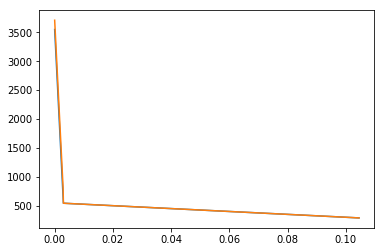

In [8]:
plt.plot(x,ys[1,::-1])
plt.plot(x, y2s[1,::-1])

In [10]:
max(ys[1])

3546.9000000000015

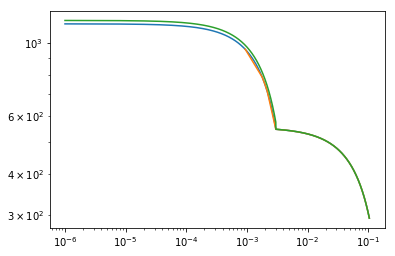

In [110]:
plt.loglog(x,ys[3,::-1])
plt.loglog(table.index, table['5, 1000000'])
plt.loglog(x, y2s[3,::-1])

In [112]:
print(max(ys[2]), max(table['2, 1000000']))

2047.1475 2047.12640238


In [98]:
tot = 0
for i, val in enumerate(table['1, 1000000']):
    print(val - y2s[1, len(y2s[1])-i-1])

-130.039846795
-1051.98555958
-1043.31345313
-1035.1891282
-1034.10518979
-1874.87454415
-2066.02821623
-2233.30756558
-3050.0073147
-3042.12902948
-3032.22357507
-3022.27680178
-3015.31505832
-3008.59116425
-2999.13932545
-2989.28830063
-2980.39952527
-2970.81250785
-2961.18086342
-2952.62876017
-2943.39867967
-2935.15252898
-2925.68237724
-2916.1639931
-2911.78155565
-2901.83834907
-2891.83934446
-2881.85203916
-2871.87308998
-2861.87697249
-2851.87853308
-2841.88272988
-2836.15898029
-2828.5063142
-2818.50765889
-2808.50778168
-2798.51006681
-2788.52266436
-2778.57091941
-2774.39882501
-2764.56535818
-2754.78614253
-2747.95055951
-2741.49458889
-2731.51075237
-2721.53663469
-2711.61233231
-2701.81796975
-2691.93683763
-2681.94006509
-2671.96752615
-2668.29691837
-2658.94863779
-2650.21797057
-2640.53700562
-2630.71708218
-2621.13737854
-2615.17182925
-2606.7359626
-2597.10123907
-2587.80463536
-2579.3074935
-2571.43927226
-2561.82476213
-2553.11772648
-2543.50551255
-2533.88690729
-

In [99]:
print(y2s[1,len(y2s[1])-1-0], table['1, 1000000'])

3677.14999999 z
0.000000    3547.110153
0.000932    2615.164440
0.000933    2613.836547
0.000935    2611.960872
0.000944    2603.044810
0.001795    1752.275456
0.001996    1551.121784
0.002173    1373.842434
0.003000     547.142685
0.003849     545.020971
0.003887     544.926425
0.003908     544.873198
0.005123     541.834942
0.006434     538.558836
0.006653     538.010675
0.006712     537.861699
0.007157     536.750475
0.007322     536.337492
0.007470     535.969137
0.008049     534.521240
0.008357     533.751320
0.009058     531.997471
0.009270     531.467623
0.009463     530.986007
0.011710     525.368444
0.011733     525.311651
0.011733     525.310656
0.011738     525.297961
0.011747     525.276910
0.011748     525.273027
               ...     
0.090626     328.083172
0.090803     327.642152
0.094127     319.331577
0.094132     319.319198
0.094133     319.317904
0.094134     319.314695
0.094139     319.302732
0.094140     319.299745
0.094146     319.283948
0.094198     319.154958


In [69]:
y1 = ys[1]
y1p = []
for i, val in enumerate(y1[1:]):
    y1p.append((val-y1[i])/1)

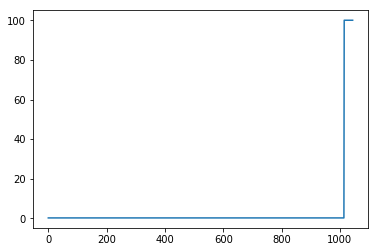

In [70]:
plt.plot(y1p)